<a href="https://colab.research.google.com/github/IghnaKrnzm/ExDataScient-Data_Bank_Classification/blob/main/Exercise_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Library

In [ ]:
import pandas as pd # untuk memasukan dataset ke data frame
import seaborn as sns # untuk mempercantik visualisasi
import matplotlib.pyplot as plt # untuk menggambar grafik
from sklearn.model_selection import train_test_split #untuk membagi traning dan testing
from sklearn.tree import DecisionTreeClassifier # memakai ddecision tree
from sklearn.ensemble import RandomForestClassifier # memakai random forest
from sklearn.naive_bayes import GaussianNB # Memakai naive bayes
import numpy as np # untuk melakukan perhitungan
from sklearn.pipeline import Pipeline # agar nilai tidak bocor
from sklearn.model_selection import GridSearchCV # untuk mencari parameter terbaik


# untuk melihat score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

# 2. Read Dataset

In [ ]:
df = pd.read_csv('/content/bank.csv') # Import dataset
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [ ]:
df.describe() # Melihat deskripsi dari dataset

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
df.info() # Melihat informasi dari dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


### Cek missing value

In [ ]:
# menampilkan jumlah missing values di setiap kolom
missing_values_count = df.isnull().sum()
print("Jumlah missing disetiap kolom:\n",missing_values_count)

Jumlah missing disetiap kolom:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


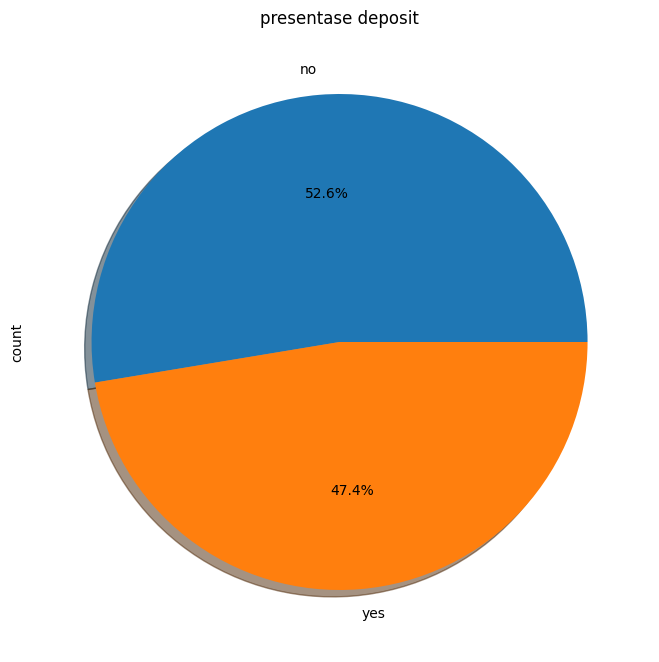

In [ ]:
f,ax,=plt.subplots(figsize=(8,10))
ax=df['deposit'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',shadow=True)
ax.set_title('presentase deposit')
plt.show()

### Cek duplikat

In [ ]:
df.duplicated().sum()

0

### Cek apakah data bernilai konstan

In [ ]:
# menghitung jumlah nilai unik di setiap kolom
unique_counts = df.apply(pd.Series.nunique)

# menampilkan kolom yang memiliki nilai unik
colomn_with_single_value = unique_counts[unique_counts == 1].index.tolist()
print("kolom yangm memiliki nilai unik", colomn_with_single_value)

kolom yangm memiliki nilai unik []


# 3. Visualisasi data dengan Label

### Kolom plot dataset

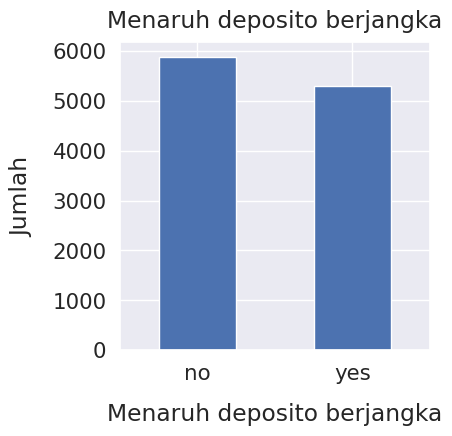

In [ ]:
sns.set(font_scale=1.4)

# Plot distribusi kolom 'deposit' di DataFrame
df['deposit'].value_counts().plot(kind='bar', figsize=(4, 4), rot=0)

plt.xlabel('Menaruh deposito berjangka', labelpad=14)
plt.ylabel('Jumlah', labelpad=14)
plt.title('Menaruh deposito berjangka', y=1.02)

plt.show()  # Tambahkan plt.show() untuk menampilkan plot


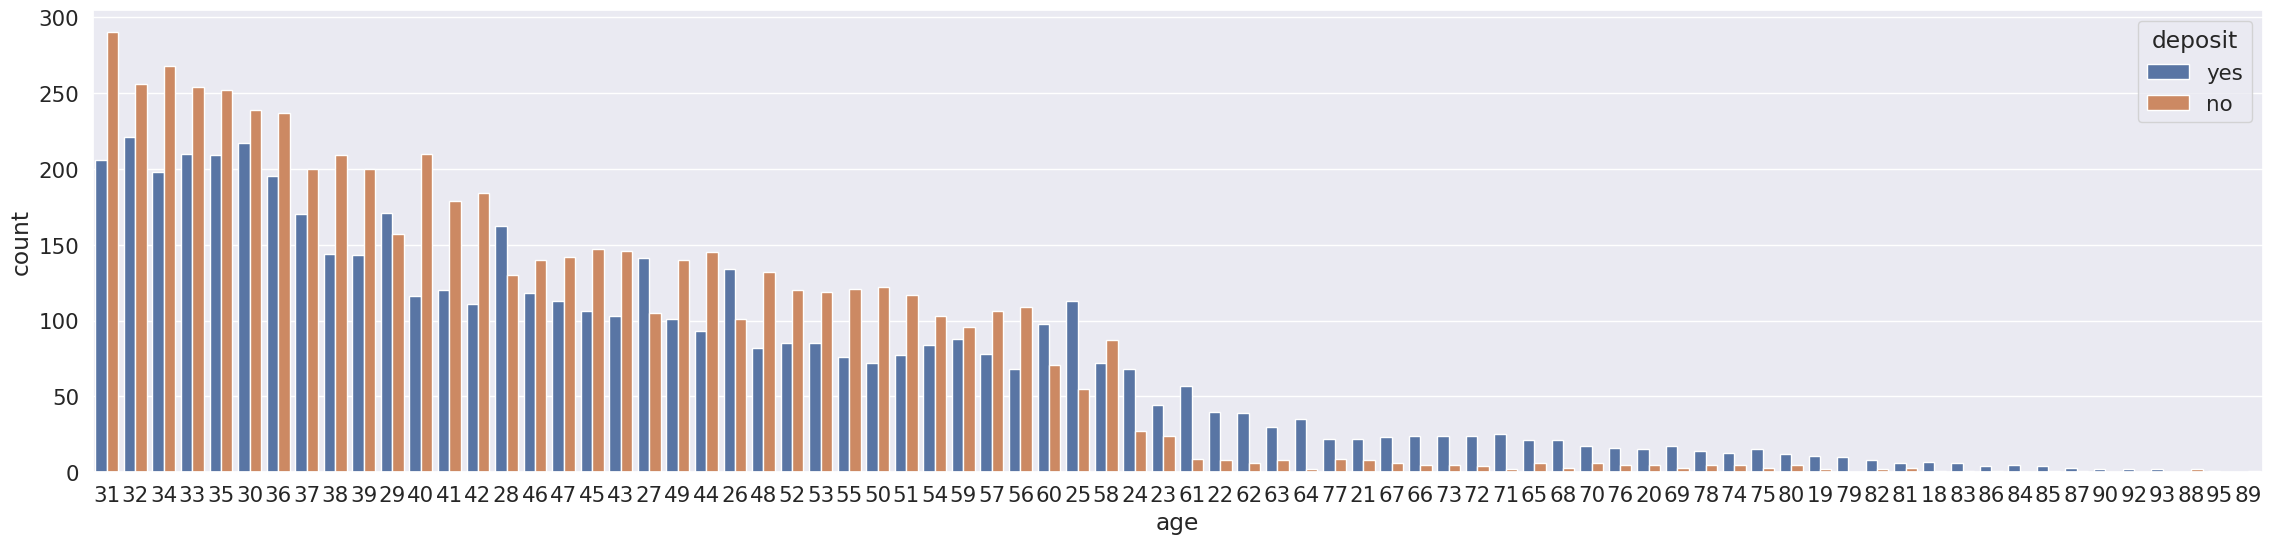

In [ ]:
# Membuat figure dan subplot dengan ukuran (28, 6)
plt.subplots(figsize=(28, 6))

# Membuat count plot menggunakan seaborn
sns.countplot(x=df['age'], order=df['age'].value_counts().index,hue=df['deposit'])  # Sumbu x berdasarkan kolom 'age', diurutkan berdasarkan jumlah kemunculan, dan warna berdasarkan kolom 'deposit'

# Menampilkan plot
plt.show()

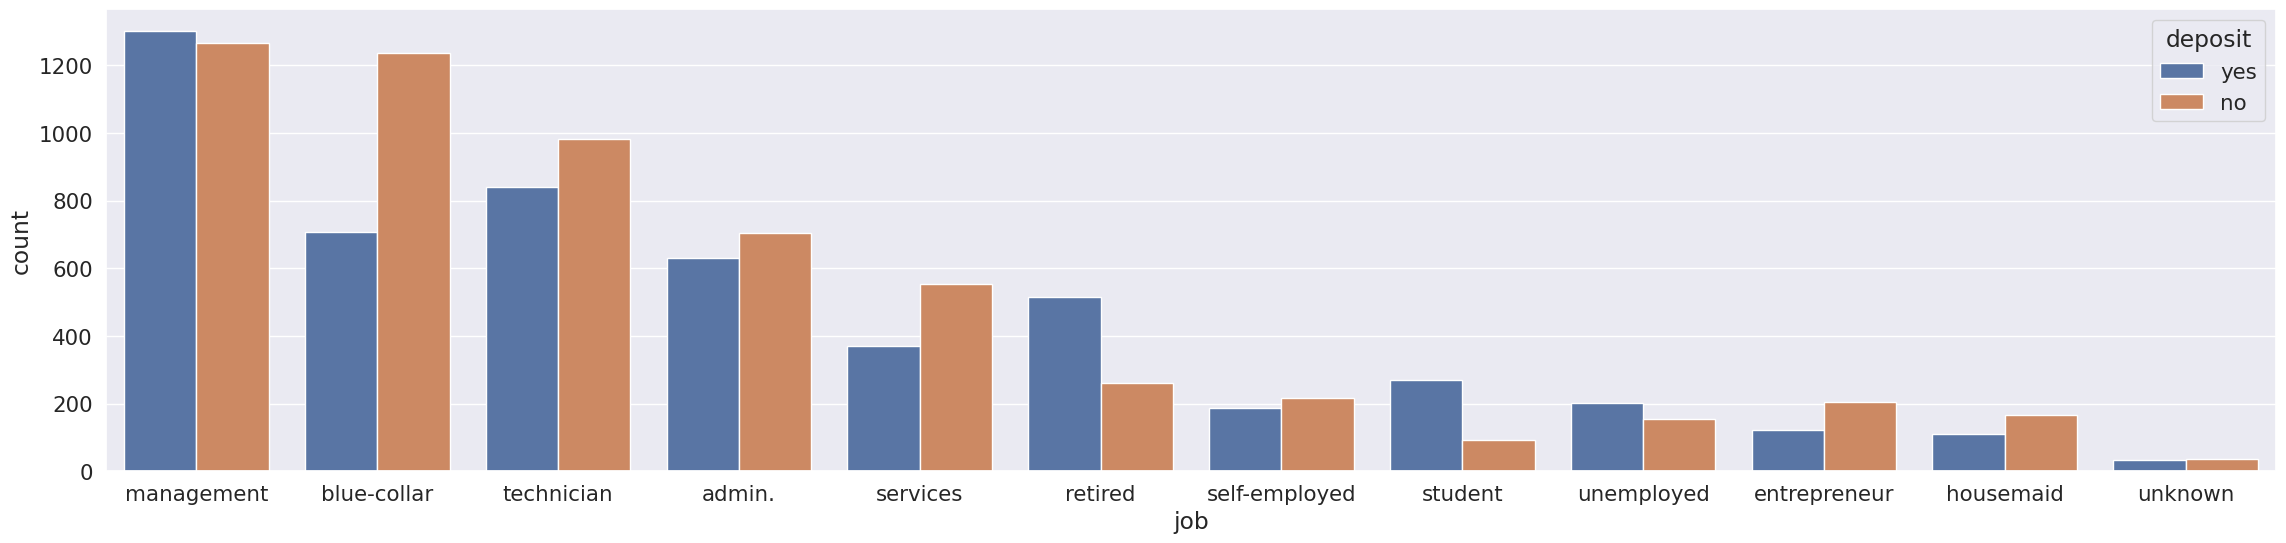

In [ ]:
# Membuat figure dan subplot dengan ukuran (28, 6)
plt.subplots(figsize=(28, 6))

#  Membuat count plot menggunakan seaborn
sns.countplot(x=df['job'], order=df['job'].value_counts().index,hue=df['deposit']) #  Sumbu x berdasarkan kolom 'Job', diurutkan berdasarkan jumlah kemunculan, dan warna berdasarkan kolom 'deposit'
plt.show()

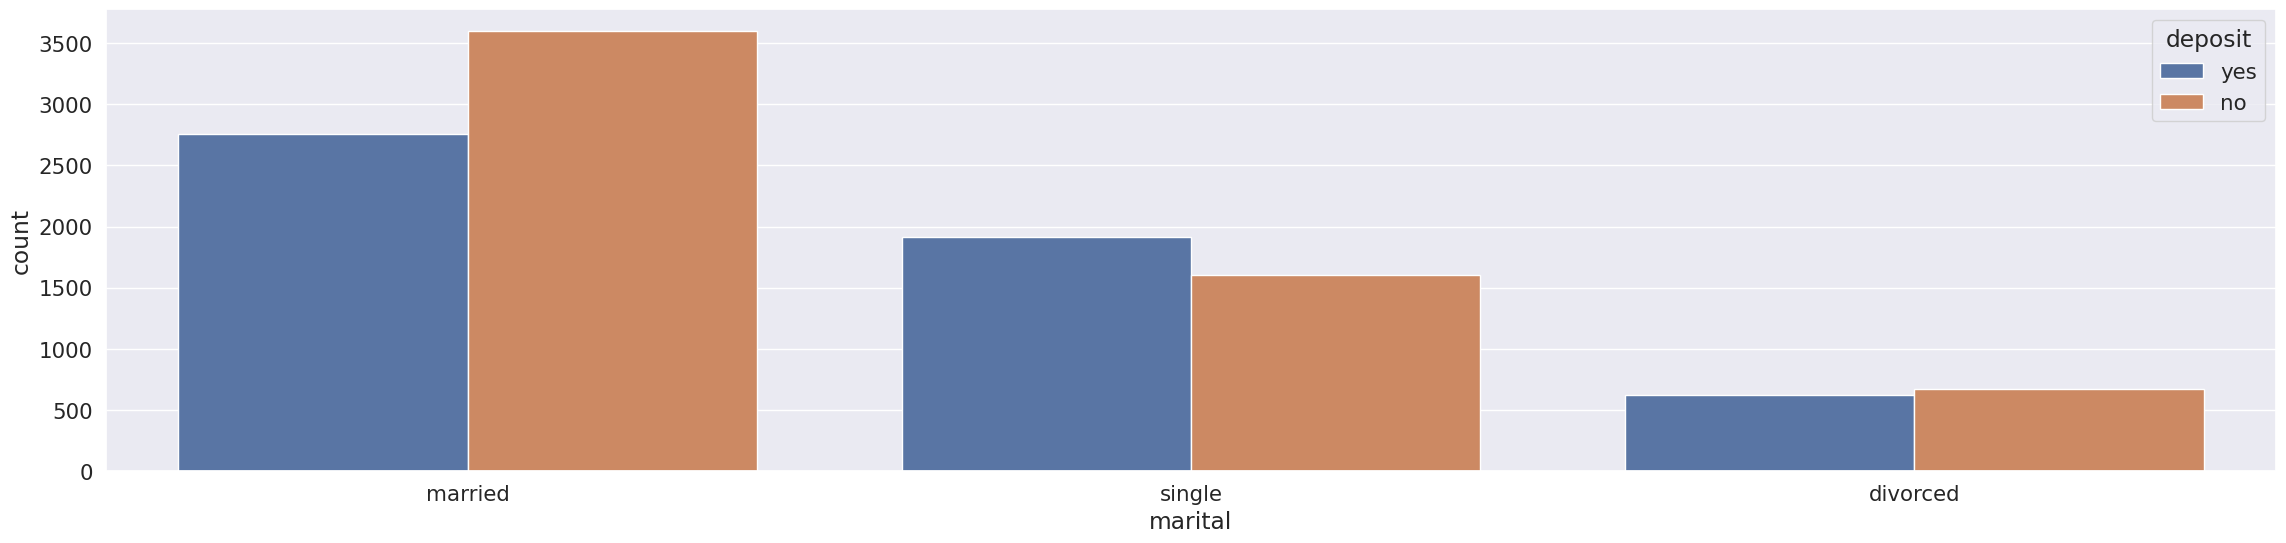

In [ ]:
#  Membuat figure dan subplot dengan ukuran (28, 6)
plt.subplots(figsize=(28, 6))

#  Membuat count plot menggunakan seaborn
sns.countplot(x=df['marital'], order=df['marital'].value_counts().index,hue=df['deposit']) # # Sumbu x berdasarkan kolom 'marital', diurutkan berdasarkan jumlah kemunculan, dan warna berdasarkan kolom 'deposit'
plt.show()

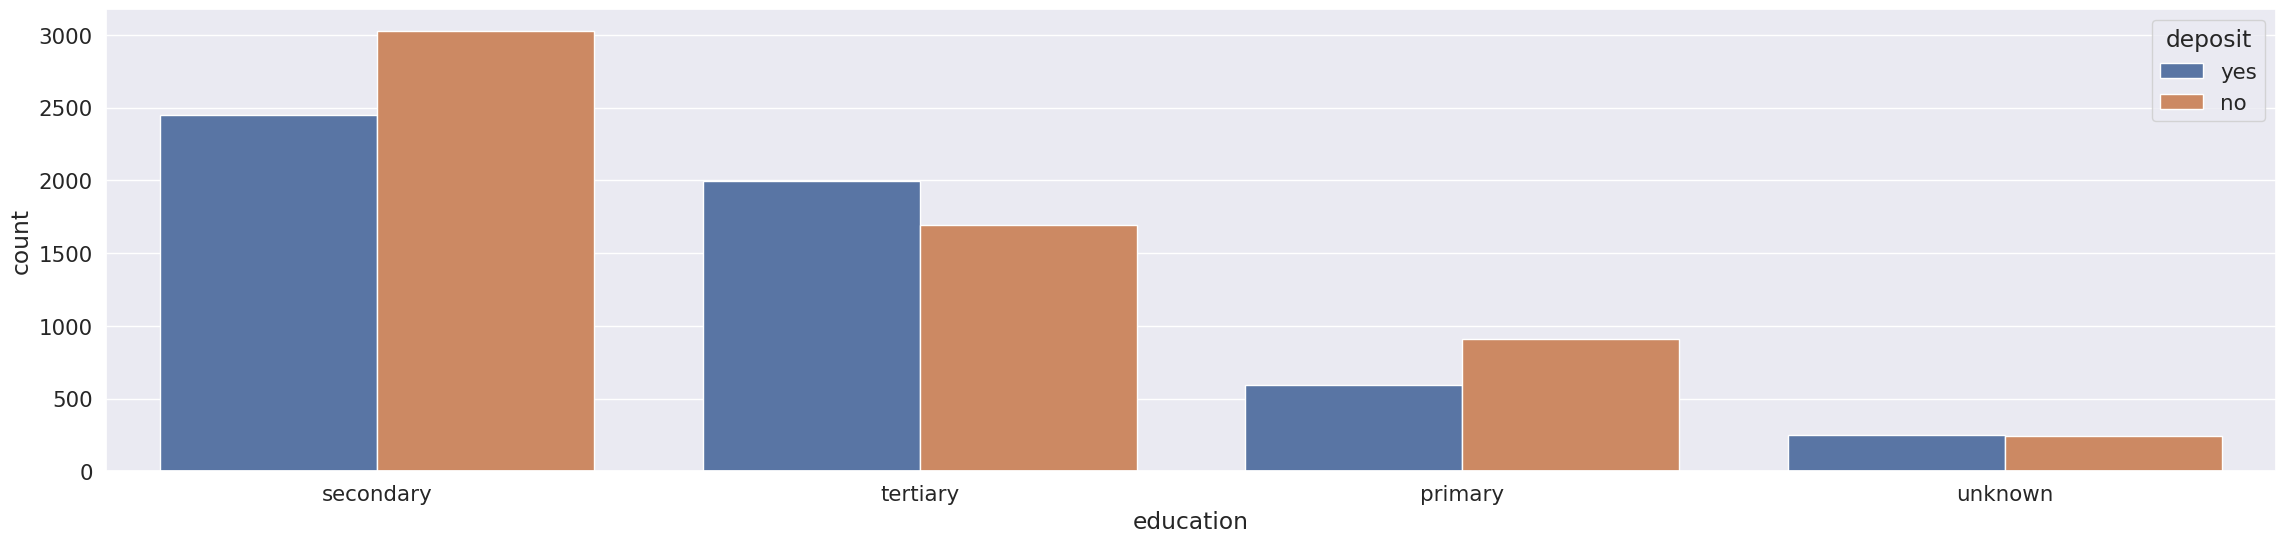

In [ ]:
#  Membuat figure dan subplot dengan ukuran (28, 6)
plt.subplots(figsize=(28, 6))

#  Membuat count plot menggunakan seaborn
sns.countplot(x=df['education'], order=df['education'].value_counts().index,hue=df['deposit']) # Sumbu x berdasarkan kolom 'education', diurutkan berdasarkan jumlah kemunculan, dan warna berdasarkan kolom 'deposit'
plt.show()

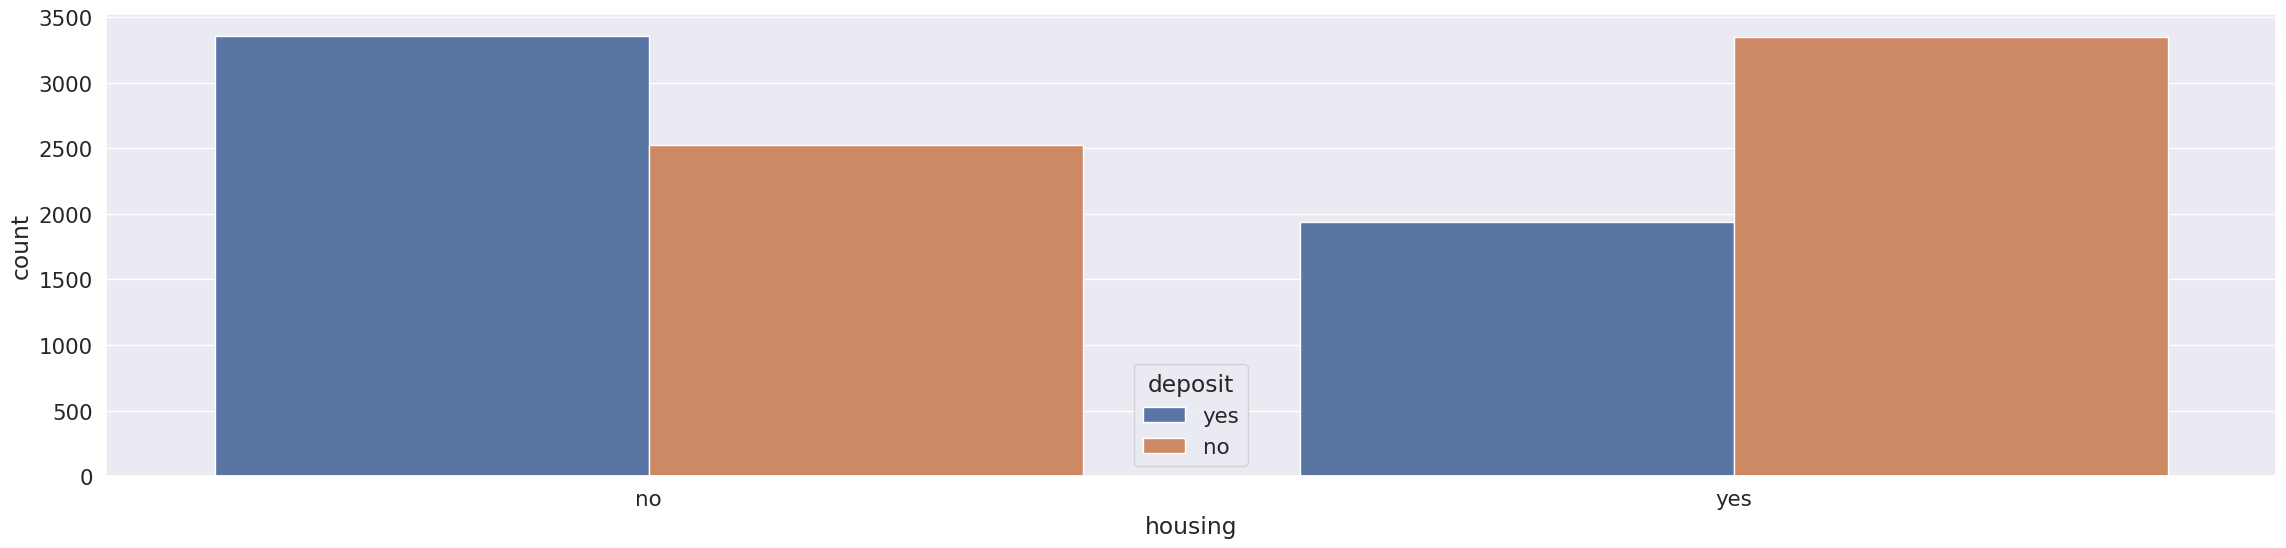

In [ ]:
#  Membuat figure dan subplot dengan ukuran (28, 6)
plt.subplots(figsize=(28, 6))

#  Membuat count plot menggunakan seaborn
sns.countplot(x=df['housing'], order=df['housing'].value_counts().index,hue=df['deposit']) # Sumbu x berdasarkan kolom 'housing', diurutkan berdasarkan jumlah kemunculan, dan warna berdasarkan kolom 'deposit'
plt.show()

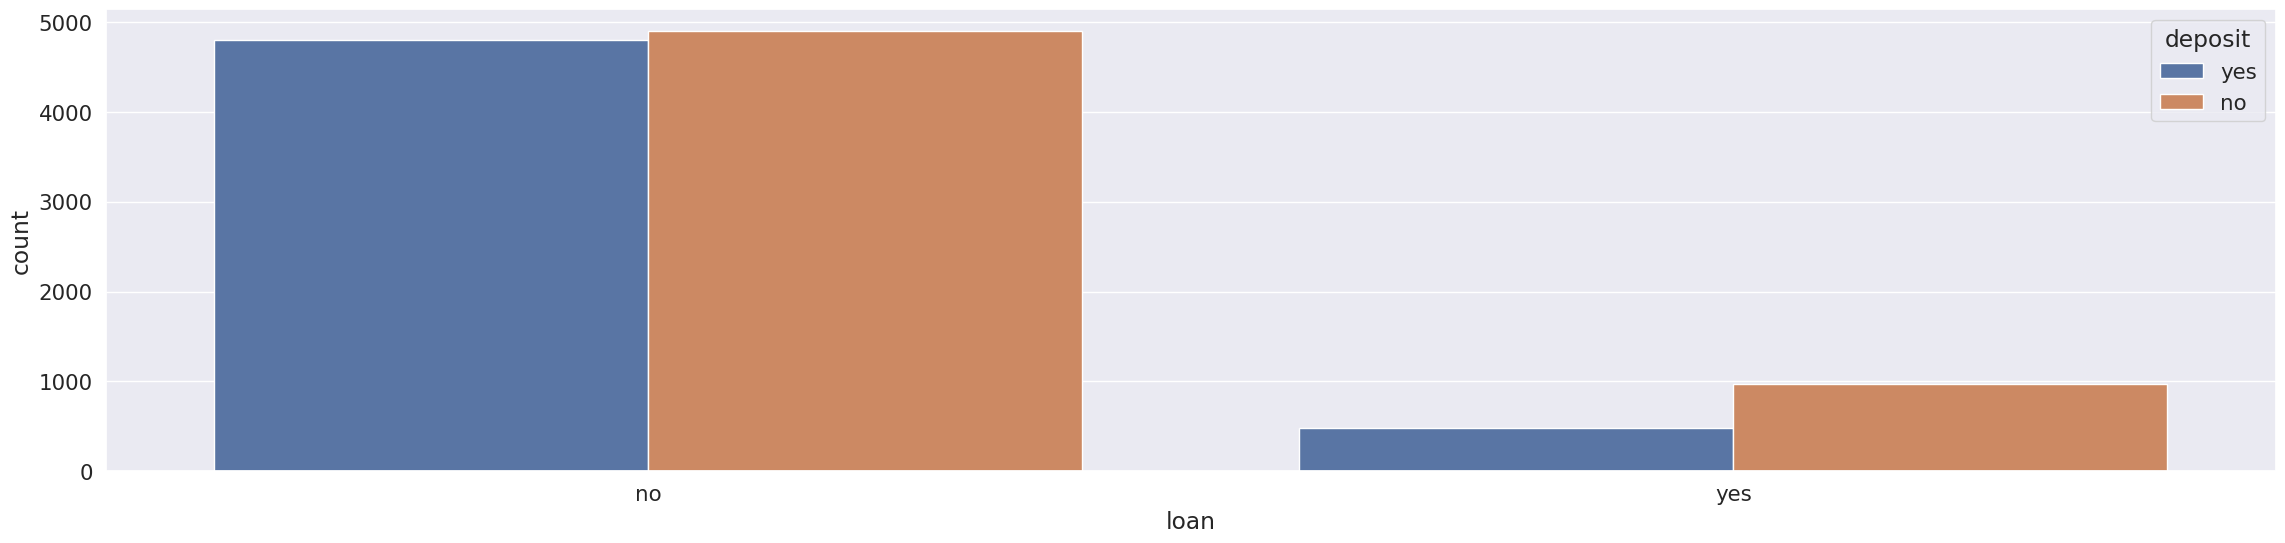

In [ ]:
#  Membuat figure dan subplot dengan ukuran (28, 6)
plt.subplots(figsize=(28, 6))

#  Membuat count plot menggunakan seaborn
sns.countplot(x=df['loan'], order=df['loan'].value_counts().index,hue=df['deposit']) #Sumbu x berdasarkan kolom 'loan', diurutkan berdasarkan jumlah kemunculan, dan warna berdasarkan kolom 'deposit'
plt.show()

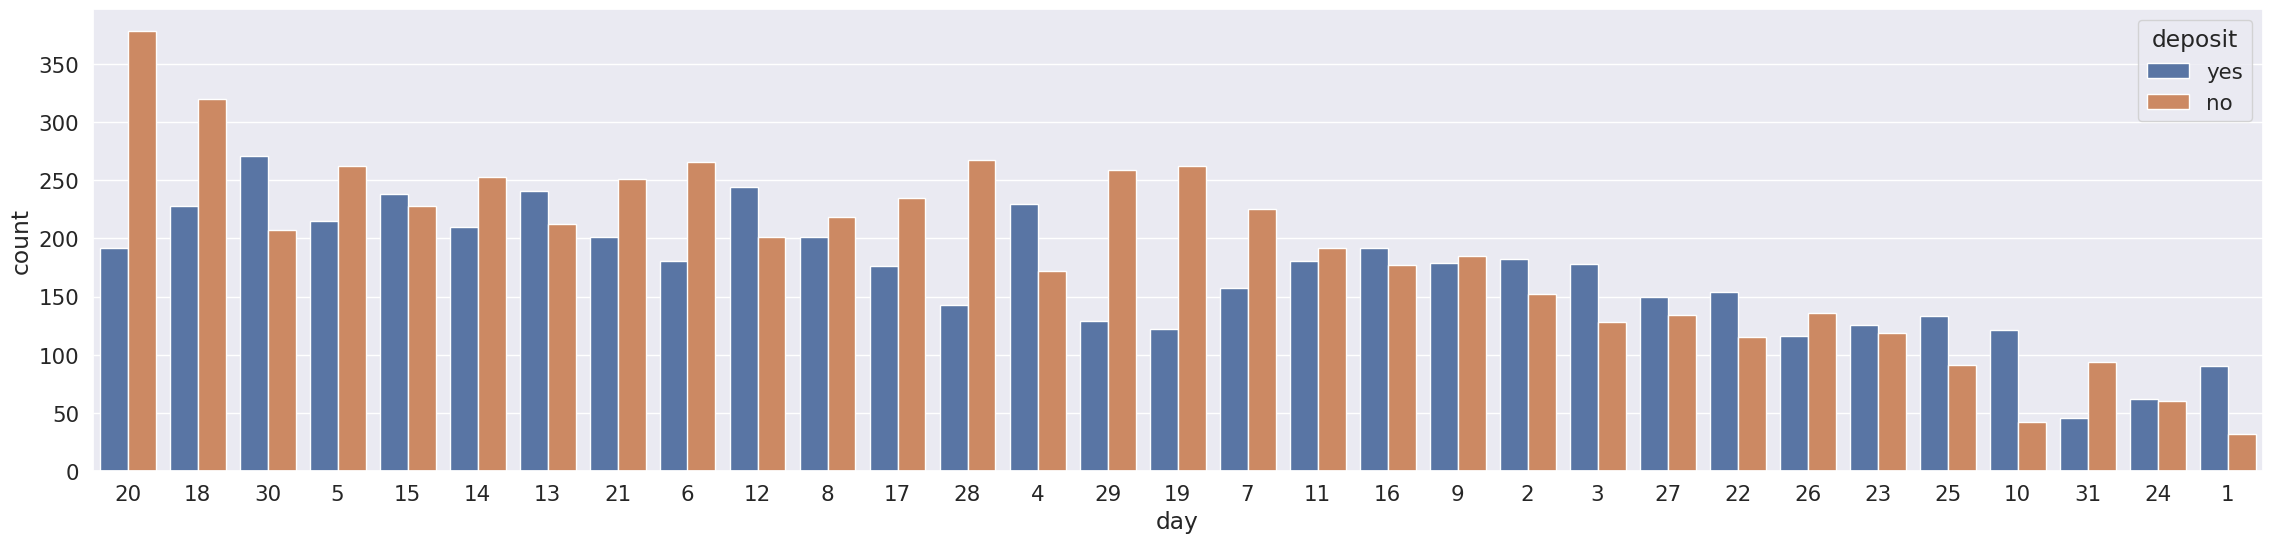

In [ ]:
#  Membuat figure dan subplot dengan ukuran (28, 6)
plt.subplots(figsize=(28, 6))

#  Membuat count plot menggunakan seaborn
sns.countplot(x=df['day'], order=df['day'].value_counts().index,hue=df['deposit']) # Sumbu x berdasarkan kolom 'day', diurutkan berdasarkan jumlah kemunculan, dan warna berdasarkan kolom 'deposit'
plt.show()

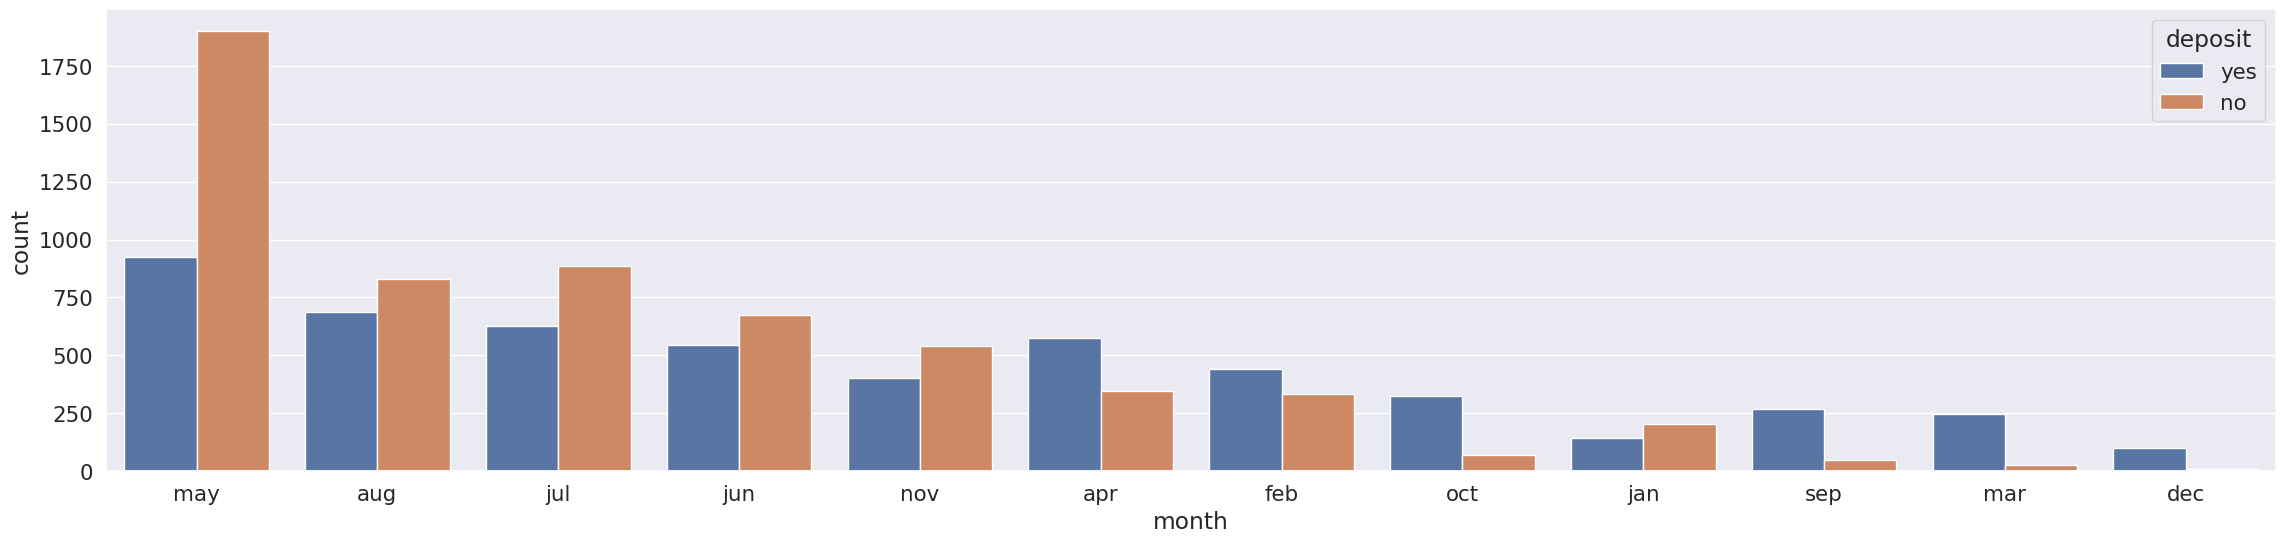

In [ ]:
#  Membuat figure dan subplot dengan ukuran (28, 6)
plt.subplots(figsize=(28, 6))

#  Membuat count plot menggunakan seaborn
sns.countplot(x=df['month'], order=df['month'].value_counts().index,hue=df['deposit']) # Sumbu x berdasarkan kolom 'month', diurutkan berdasarkan jumlah kemunculan, dan warna berdasarkan kolom 'deposit'
plt.show()

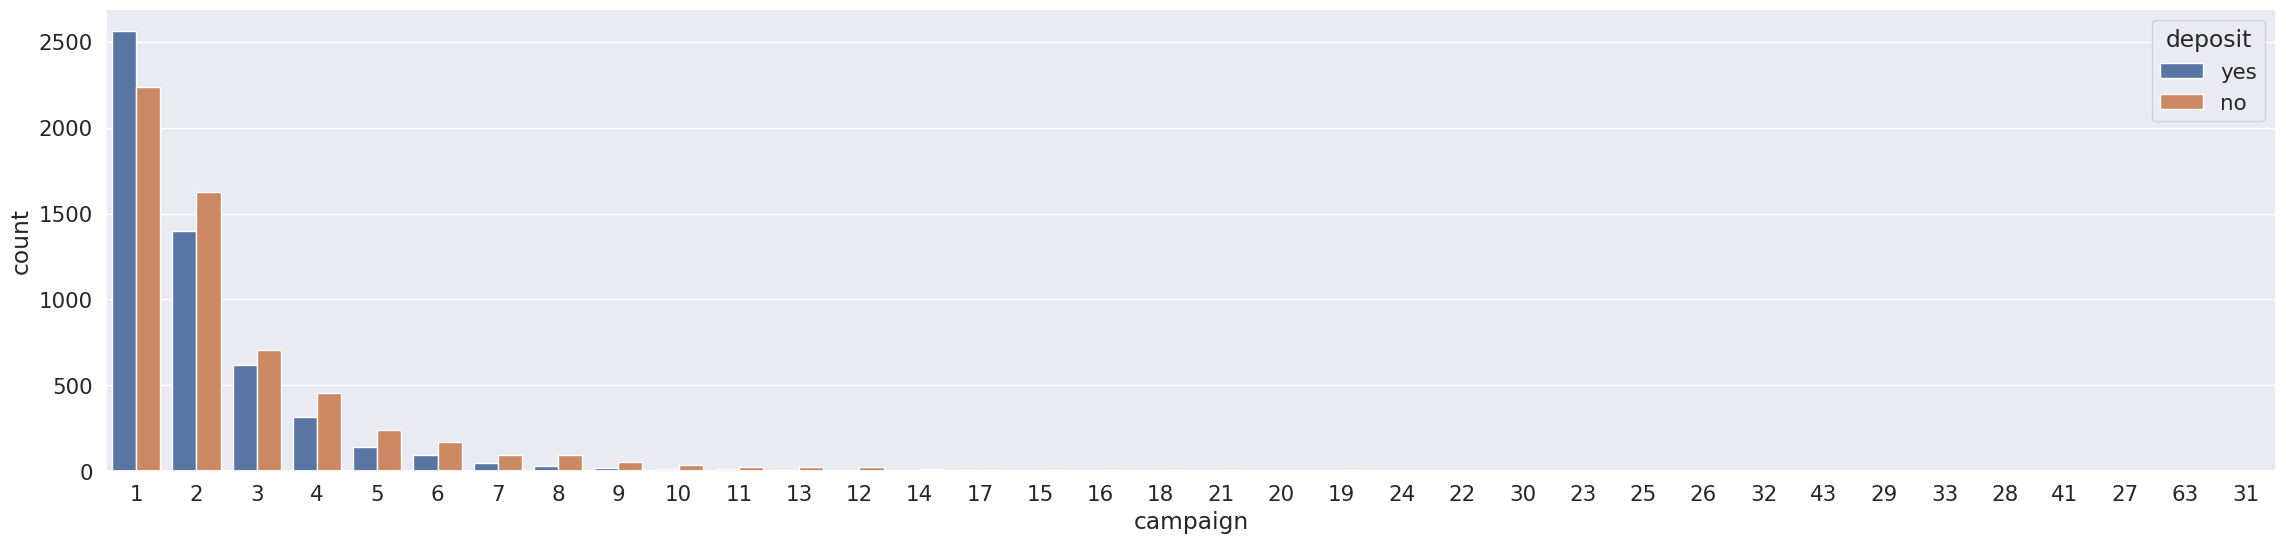

In [ ]:
#  Membuat figure dan subplot dengan ukuran (22, 6)
plt.subplots(figsize=(28, 6))

#  Membuat count plot menggunakan seaborn
sns.countplot(x=df['campaign'], order=df['campaign'].value_counts().index,hue=df['deposit']) # # Sumbu x berdasarkan kolom 'campaign', diurutkan berdasarkan jumlah kemunculan, dan warna berdasarkan kolom 'deposit'
plt.show()

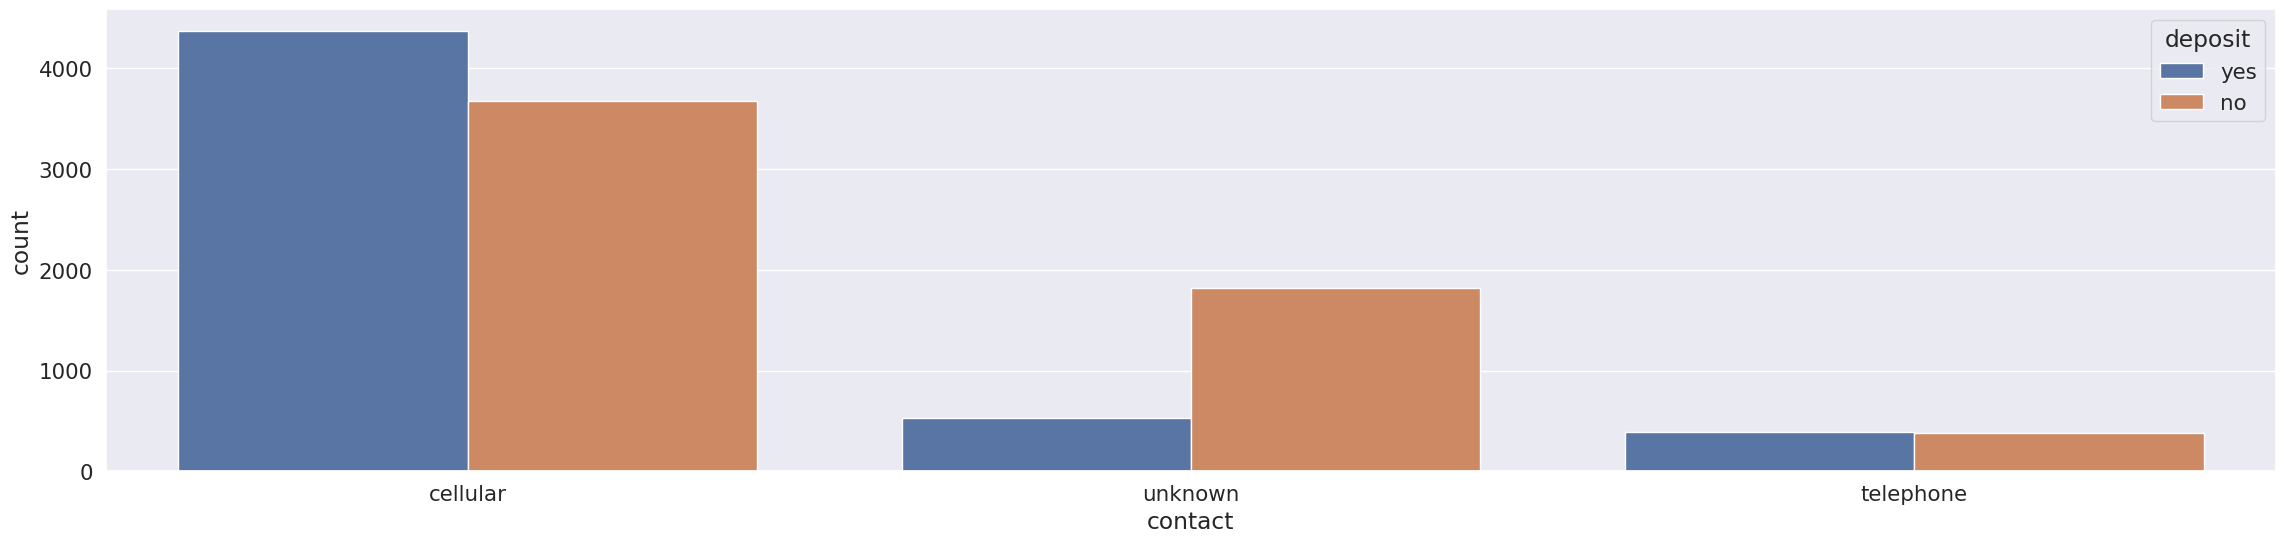

In [ ]:
#  Membuat figure dan subplot dengan ukuran (22, 6)
plt.subplots(figsize=(28, 6))

#  Membuat count plot menggunakan seaborn
sns.countplot(x=df['contact'], order=df['contact'].value_counts().index,hue=df['deposit']) # # Sumbu x berdasarkan kolom 'campaign', diurutkan berdasarkan jumlah kemunculan, dan warna berdasarkan kolom 'deposit'
plt.show()

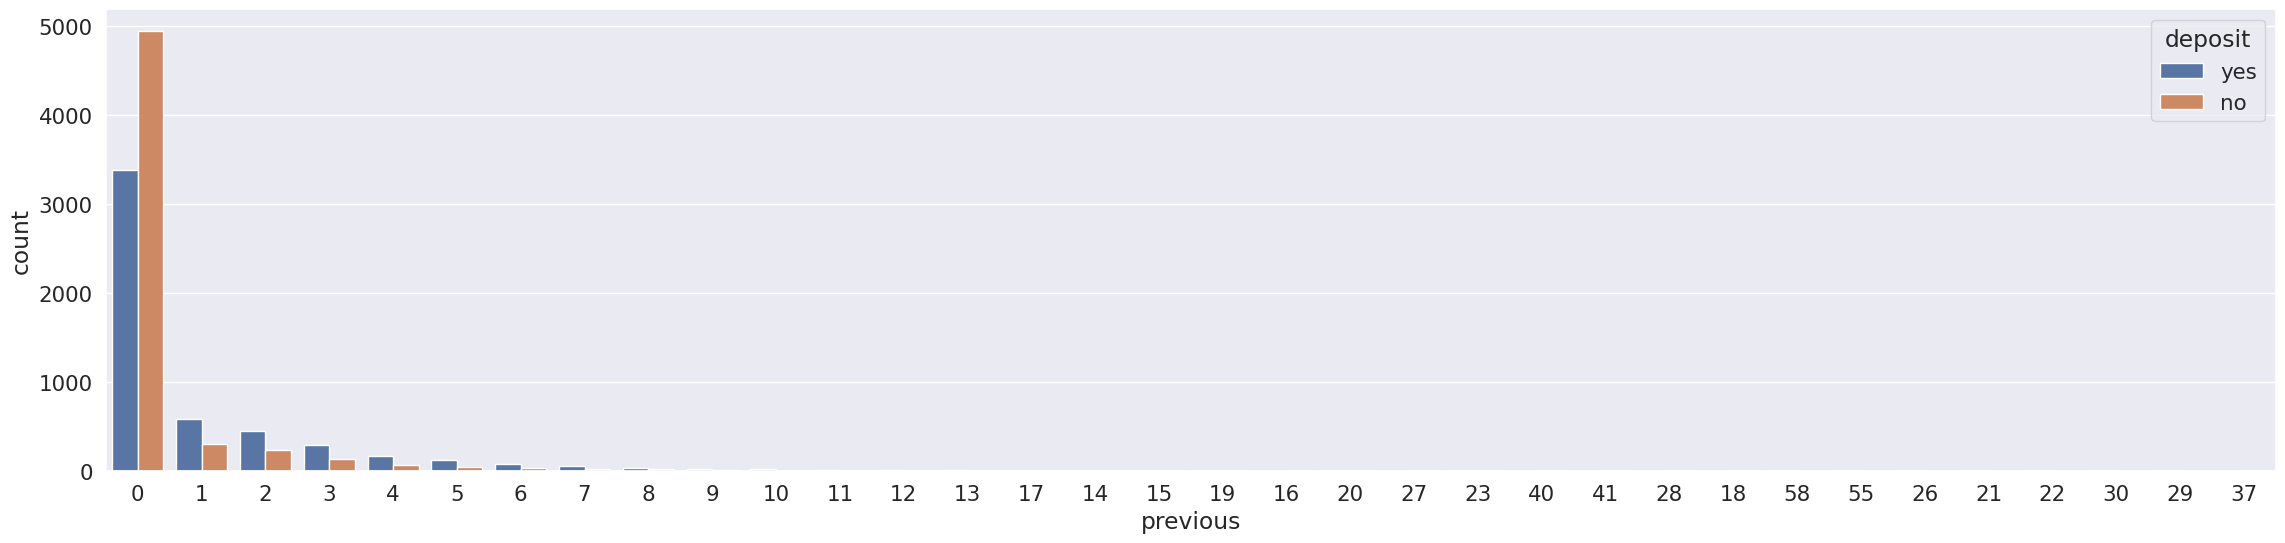

In [ ]:
#  Membuat figure dan subplot dengan ukuran (28, 6)
plt.subplots(figsize=(28, 6))

#  Membuat count plot menggunakan seaborn
sns.countplot(x=df['previous'], order=df['previous'].value_counts().index,hue=df['deposit']) # Sumbu x berdasarkan kolom 'housing', diurutkan berdasarkan jumlah kemunculan, dan warna berdasarkan kolom 'deposit'
plt.show()

### Konversi Nilai

In [ ]:
categorical_columns = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'deposit']

In [ ]:
categorical_col = []
for col in categorical_columns:
    categorical_col.append(col)
    print(f'{col} : {df[col].unique()}')
    print('===================================================')

job : ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital : ['married' 'single' 'divorced']
education : ['secondary' 'tertiary' 'primary' 'unknown']
housing : ['yes' 'no']
loan : ['no' 'yes']
contact : ['unknown' 'cellular' 'telephone']
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
deposit : ['yes' 'no']


In [ ]:
job = {'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management':  4,
       'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9,
       'unemployed': 10}
df['job'] = df['job'].map(job)

marital = {'divorced': 0, 'married': 1, 'single': 2}
df['marital'] = df['marital'].map(marital)

education = {'primary': 0, 'secondary': 1, 'tertiary': 2}
df['education'] = df['education'].map(education)

default = {'no': 0, 'yes': 1}
df['default'] = df['default'].map(default)

housing = {'no': 0, 'yes': 1}
df['housing'] = df['housing'].map(housing)

loan = {'no': 0, 'yes': 1}
df['loan'] = df['loan'].map(loan)

contact = {'cellular': 0, 'telephone': 1}
df['contact'] = df['contact'].map(contact)

month = {'jan': 0, 'feb': 1, 'mar': 2, 'apr': 3, 'may': 4, 'jun': 5, 'jul': 6, 'aug': 7, 'sep': 8, 'oct': 9, 'nov': 10, 'dec': 11}
df['month'] = df['month'].map(month)

poutcome = {'failure': 0, 'other': 1, 'success': 2}
df['poutcome'] = df['poutcome'].map(poutcome)

deposit = {'no': 0, 'yes': 1}
df['deposit'] = df['deposit'].map(deposit)


In [ ]:
df.loc[:, df.isnull().any()].columns

Index(['job', 'education', 'contact', 'poutcome'], dtype='object')

In [ ]:
df.describe() # melihat deskripsi dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11092.000000,11162.000000,10665.000000,11162.000000,11162.000000,11162.000000,11162.000000,8816.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,2836.000000,11162.000000
mean,41.231948,4.446809,1.199337,1.205251,0.015051,1528.538524,0.473123,0.130801,0.087795,15.658036,5.190826,371.993818,2.508421,51.330407,0.832557,0.944640,0.473840
std,11.913369,3.193397,0.625552,0.666677,0.121761,3225.413326,0.499299,0.337198,0.283012,8.420740,2.572792,347.128386,2.722077,108.758282,2.292007,0.898815,0.499338
min,18.000000,0.000000,0.000000,0.000000,0.000000,-6847.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,0.000000,122.000000,0.000000,0.000000,0.000000,8.000000,4.000000,138.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,550.000000,0.000000,0.000000,0.000000,15.000000,5.000000,255.000000,2.000000,-1.000000,0.000000,1.000000,0.000000
75%,49.000000,7.000000,2.000000,2.000000,0.000000,1708.000000,1.000000,0.000000,0.000000,22.000000,7.000000,496.000000,3.000000,20.750000,1.000000,2.000000,1.000000
max,95.000000,10.000000,2.000000,2.000000,1.000000,81204.000000,1.000000,1.000000,1.000000,31.000000,11.000000,3881.000000,63.000000,854.000000,58.000000,2.000000,1.000000


from matplotlib import pyplot as plt
_df_0['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['job'].plot(kind='hist', bins=20, title='job')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['marital'].plot(kind='hist', bins=20, title='marital')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['education'].plot(kind='hist', bins=20, title='education')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='age', y='job', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='job', y='marital', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='marital', y='education', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='education', y='default', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['job'].plot(kind='line', figsize=(8, 4), title='job')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['marital'].plot(kind='line', figsize=(8, 4), title='marital')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['education'].plot(kind='line', figsize=(8, 4), title='education')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11162 non-null  int64  
 1   job        11092 non-null  float64
 2   marital    11162 non-null  int64  
 3   education  10665 non-null  float64
 4   default    11162 non-null  int64  
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  int64  
 7   loan       11162 non-null  int64  
 8   contact    8816 non-null   float64
 9   day        11162 non-null  int64  
 10  month      11162 non-null  int64  
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   2836 non-null   float64
 16  deposit    11162 non-null  int64  
dtypes: float64(4), int64(13)
memory usage: 1.4 MB


### Corelation Heatmap

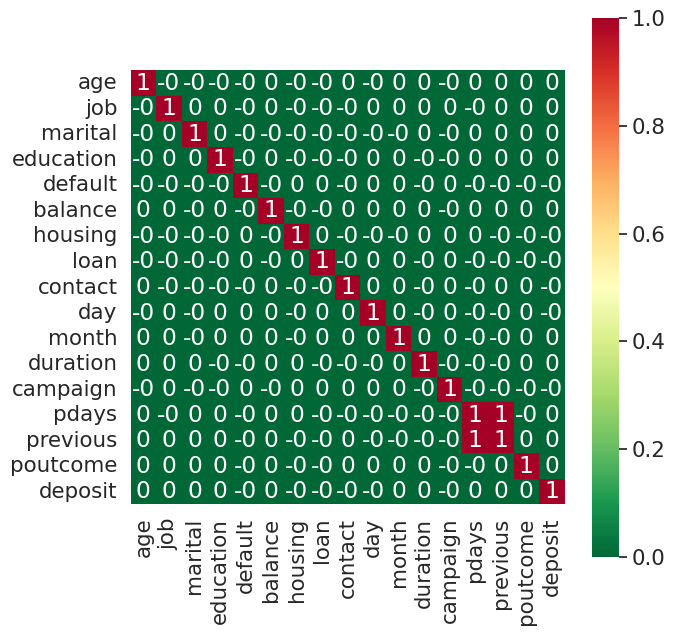

In [ ]:
# Correlation heatmap
correlation = df.corr()
plt.subplots(figsize=(7, 7))
sns.heatmap(correlation.round(),
            annot = True,
            vmax = 1,
            square = 1,
            cmap = 'RdYlGn_r')
plt.show()

# 4. Split data

### Split dataset

In [ ]:
X = df.drop('deposit', axis=1)
y = df['deposit']
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,0.0,1,1.0,0,2343,1,0,NaN,5,4,1042,1,-1,0,NaN
1,56,0.0,1,1.0,0,45,0,0,NaN,5,4,1467,1,-1,0,NaN
2,41,9.0,1,1.0,0,1270,1,0,NaN,5,4,1389,1,-1,0,NaN
3,55,7.0,1,1.0,0,2476,1,0,NaN,5,4,579,1,-1,0,NaN
4,54,0.0,1,2.0,0,184,0,0,NaN,5,4,673,2,-1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1.0,2,0.0,0,1,1,0,0.0,20,3,257,1,-1,0,NaN
11158,39,7.0,1,1.0,0,733,0,0,NaN,16,5,83,4,-1,0,NaN
11159,32,9.0,2,1.0,0,29,0,0,0.0,19,7,156,2,-1,0,NaN
11160,43,9.0,1,1.0,0,0,0,1,0.0,8,4,9,2,172,5,0.0


# 5. Klasifikasi

### Klasifikasi Decision Tree

In [ ]:
# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=90)

In [ ]:
# Membuat dan melatih model Decision Tree
model = DecisionTreeClassifier(random_state=90)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=90)

In [ ]:
from sklearn.metrics import accuracy_score

# 4. Memprediksi dan mengevaluasi
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Laporan Klasifikasi:")
print(f"Akurasi: {accuracy * 100:.2f}%")

Laporan Klasifikasi:
Akurasi: 80.16%


### Mencari Parameter

## Tree

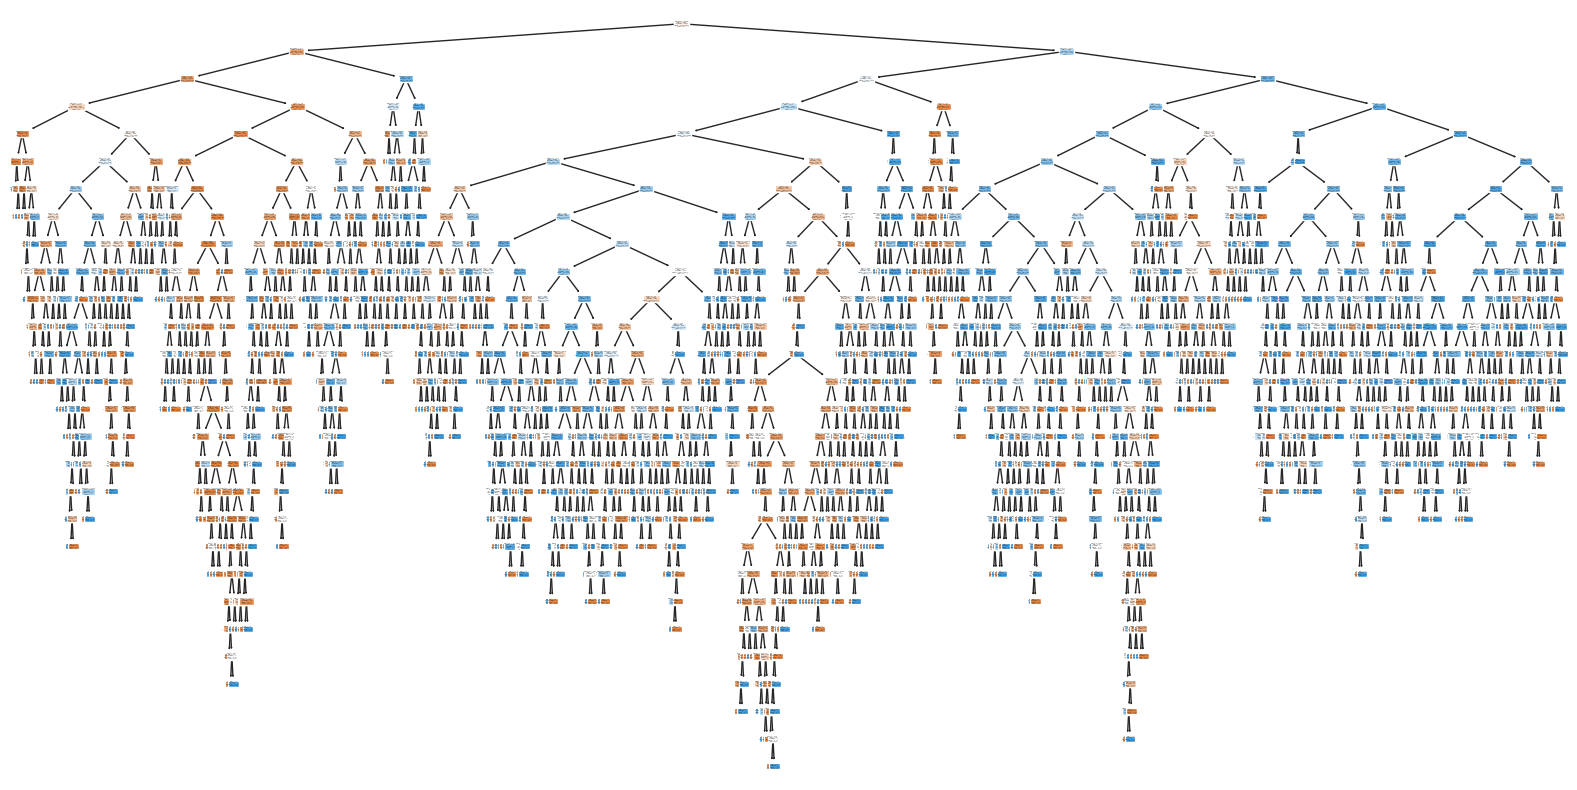

In [ ]:
plt.figure(figsize=(20,10))
from sklearn import tree # Import the tree module from sklearn
tree.plot_tree(model,
               feature_names=X.columns,
               class_names=['yes', 'no'],  # Replace le.classes_ with appropriate class names
               filled=True)
plt.show()

### model

In [ ]:
cols=X_train.columns # Menyimpan nama kolom dari X_train sebelum transformasi

# Import RobustScaler dari sklearn untuk normalisasi data
from sklearn.preprocessing import RobustScaler

scaler=RobustScaler() # Inisialisasi RobustScaler
X_train=scaler.fit_transform(X_train) # Melakukan scaling pada data training menggunakan RobustScaler
X_test=scaler.fit_transform(X_test)# Melakukan scaling pada data testing menggunakan RobustScaler

# Mengonversi kembali hasil scaling ke dalam DataFrame dengan nama kolom yang sama seperti sebelumnya
X_train=pd.DataFrame(X_train,columns=[cols])
X_test=pd.DataFrame(X_test,columns=[cols])

In [ ]:
# Import RandomForestClassifier dari sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest dengan 100 pohon keputusan (n_estimators=100)
# random_state=0 memastikan hasil yang konsisten setiap kali model dijalankan
rfc=RandomForestClassifier(n_estimators=100,random_state=0)

# Melatih model Random Forest menggunakan data training (X_train, y_train)
rfc.fit(X_train,y_train)

# Melakukan prediksi terhadap data testing (X_test)
y_pred=rfc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred)) # Menghitung akurasi model
print("Random forest model score:",np.abs(score)*100) # Menampilkan skor akurasi dalam persen

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1151
           1       0.82      0.89      0.85      1082

    accuracy                           0.85      2233
   macro avg       0.85      0.85      0.85      2233
weighted avg       0.86      0.85      0.85      2233

Random forest model score: 85.26645768025078


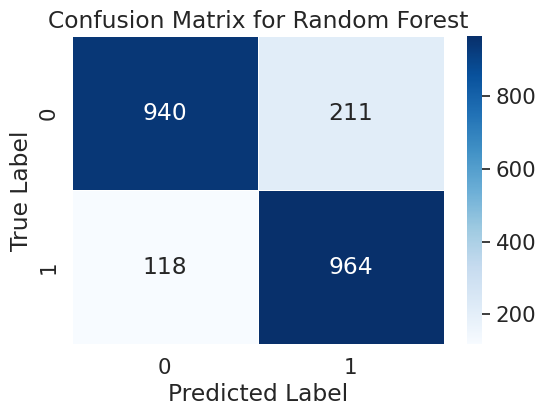

In [ ]:
# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Membuat visualisasi heatmap untuk confusion matrix
plt.figure(figsize=(6,4))  # Mengatur ukuran figure
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5)

# Menambahkan label sumbu
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Random Forest")

# Menampilkan plot
plt.show()